In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
def plot_bivariate_norm(rho, n):
    x = stats.norm.rvs(size=n)
    z = stats.norm.rvs(size=n)
    y = rho * x  +  (1 - rho**2)**0.5 * z
    plt.scatter(x, y)

    # Axes, labels, and titles
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.axes().set_aspect('equal')
    plt.xlabel('$X$')
    plt.ylabel('$Y$', rotation=0)
    plt.title('Standard Bivariate Normal, Correlation '+str(rho))

<ipython-input-2-3321eb207e5a>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


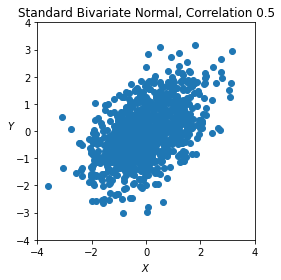

In [3]:
plot_bivariate_norm(0.5, 1000)

In [4]:
import openturns as ot
R = ot.CorrelationMatrix(2)
R[0,1] = 0.5
copula = ot.NormalCopula(R)

In [5]:
R

class=CorrelationMatrix dimension=2 implementation=class=MatrixImplementation name=Unnamed rows=2 columns=2 values=[1,0.5,0.5,1]

In [10]:
size = 10000
sample = copula.getSample(size)

In [11]:
sample

class=Sample name=NormalCopula implementation=class=SampleImplementation name=NormalCopula size=10000 dimension=2 description=[X0,X1] data=[[0.486283,0.306362],[0.262915,0.50729],[0.151149,0.0476769],...,[0.151436,0.0746984],[0.0336301,0.0933567],[0.794688,0.268778]]

In [12]:
profits = []
positive = 0
normal1 = stats.norm(100, 10)
pons = stats.poisson(100)
normal2 = stats.norm(320, 5)
for ix in range(size):
    arn = sample[ix]
    sales = pons.ppf(arn[0])
    price = normal2.ppf(arn[1])
    profit = sales*price - (10000 + 200*sales)
    profits.append(profit)
    if profit > 0: positive += 1

In [13]:
print("The probability of not having any profit = ", round(1 - positive/size,2))

The probability of not having any profit =  0.08
